In [1]:
# Import libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('blogs_categories.csv', encoding = 'latin-1',index_col=0)
df

,Data,Labels
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


<Axes: xlabel='count', ylabel='Labels'>

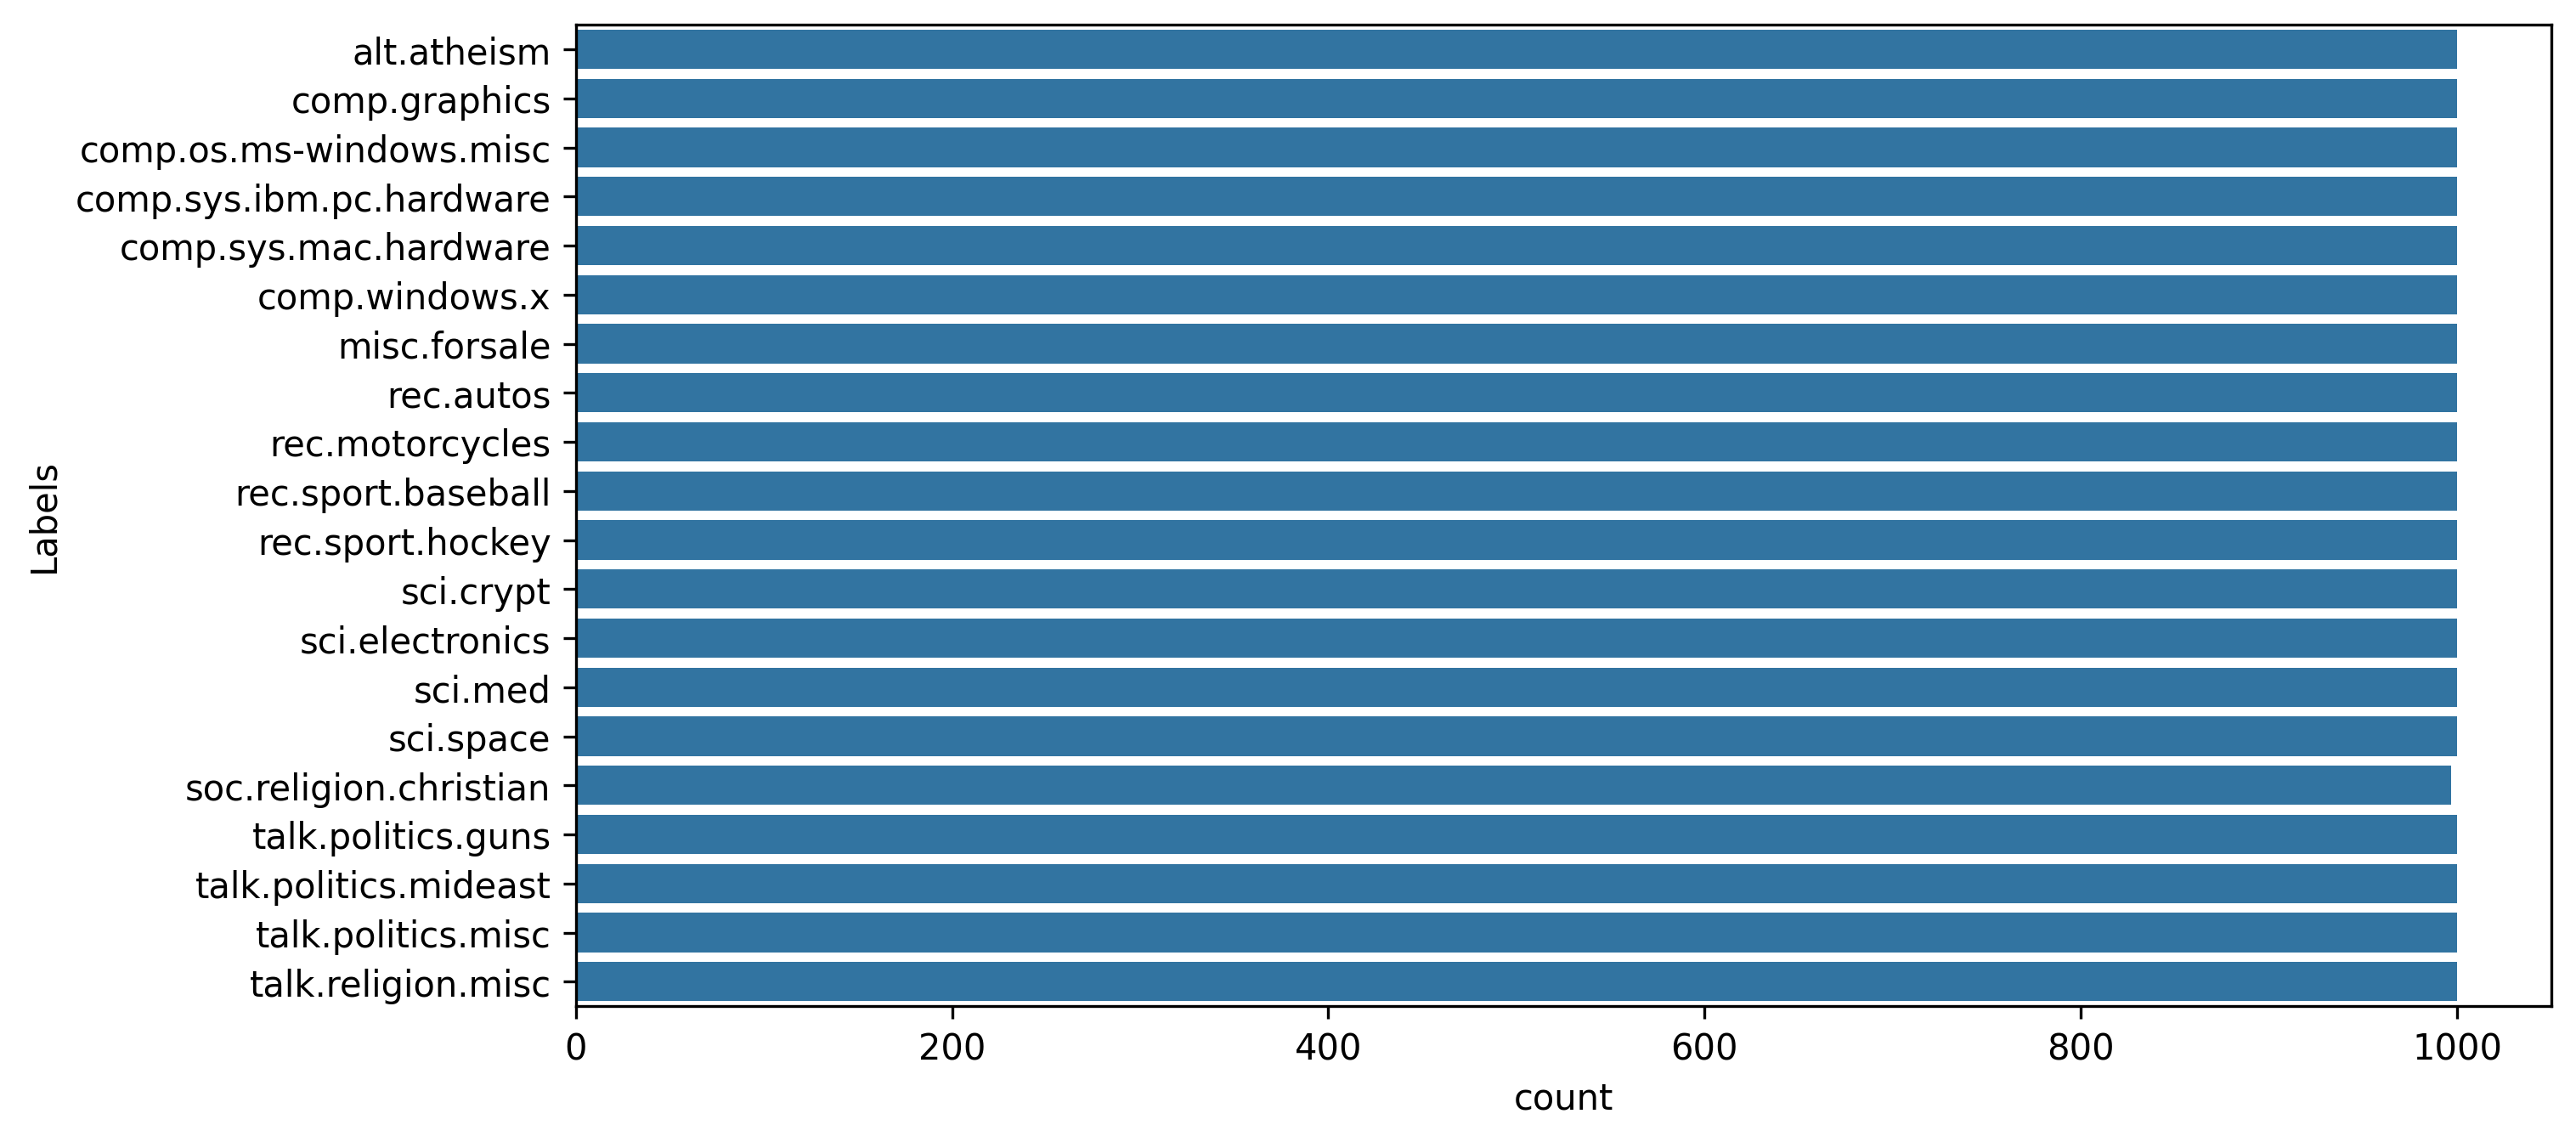

In [3]:
sns.countplot(df['Labels'])

In [4]:
df.describe()

,Data,Labels
count,19997,19997
unique,19466,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,alt.atheism
freq,4,1000


In [5]:
# Check missing values
df.isna().sum()

Data      0
Labels    0
dtype: int64

In [6]:
# Add length column

df['length'] = df['Data'].apply(len)
df

,Data,Labels,length
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,12424
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,32530
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,4550
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,2067
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,1347
...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,1803
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,2087
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1621
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,2627


array([[<Axes: title={'center': 'alt.atheism'}>,
        <Axes: title={'center': 'comp.graphics'}>,
        <Axes: title={'center': 'comp.os.ms-windows.misc'}>,
        <Axes: title={'center': 'comp.sys.ibm.pc.hardware'}>],
       [<Axes: title={'center': 'comp.sys.mac.hardware'}>,
        <Axes: title={'center': 'comp.windows.x'}>,
        <Axes: title={'center': 'misc.forsale'}>,
        <Axes: title={'center': 'rec.autos'}>],
       [<Axes: title={'center': 'rec.motorcycles'}>,
        <Axes: title={'center': 'rec.sport.baseball'}>,
        <Axes: title={'center': 'rec.sport.hockey'}>,
        <Axes: title={'center': 'sci.crypt'}>],
       [<Axes: title={'center': 'sci.electronics'}>,
        <Axes: title={'center': 'sci.med'}>,
        <Axes: title={'center': 'sci.space'}>,
        <Axes: title={'center': 'soc.religion.christian'}>],
       [<Axes: title={'center': 'talk.politics.guns'}>,
        <Axes: title={'center': 'talk.politics.mideast'}>,
        <Axes: title={'center': 'ta

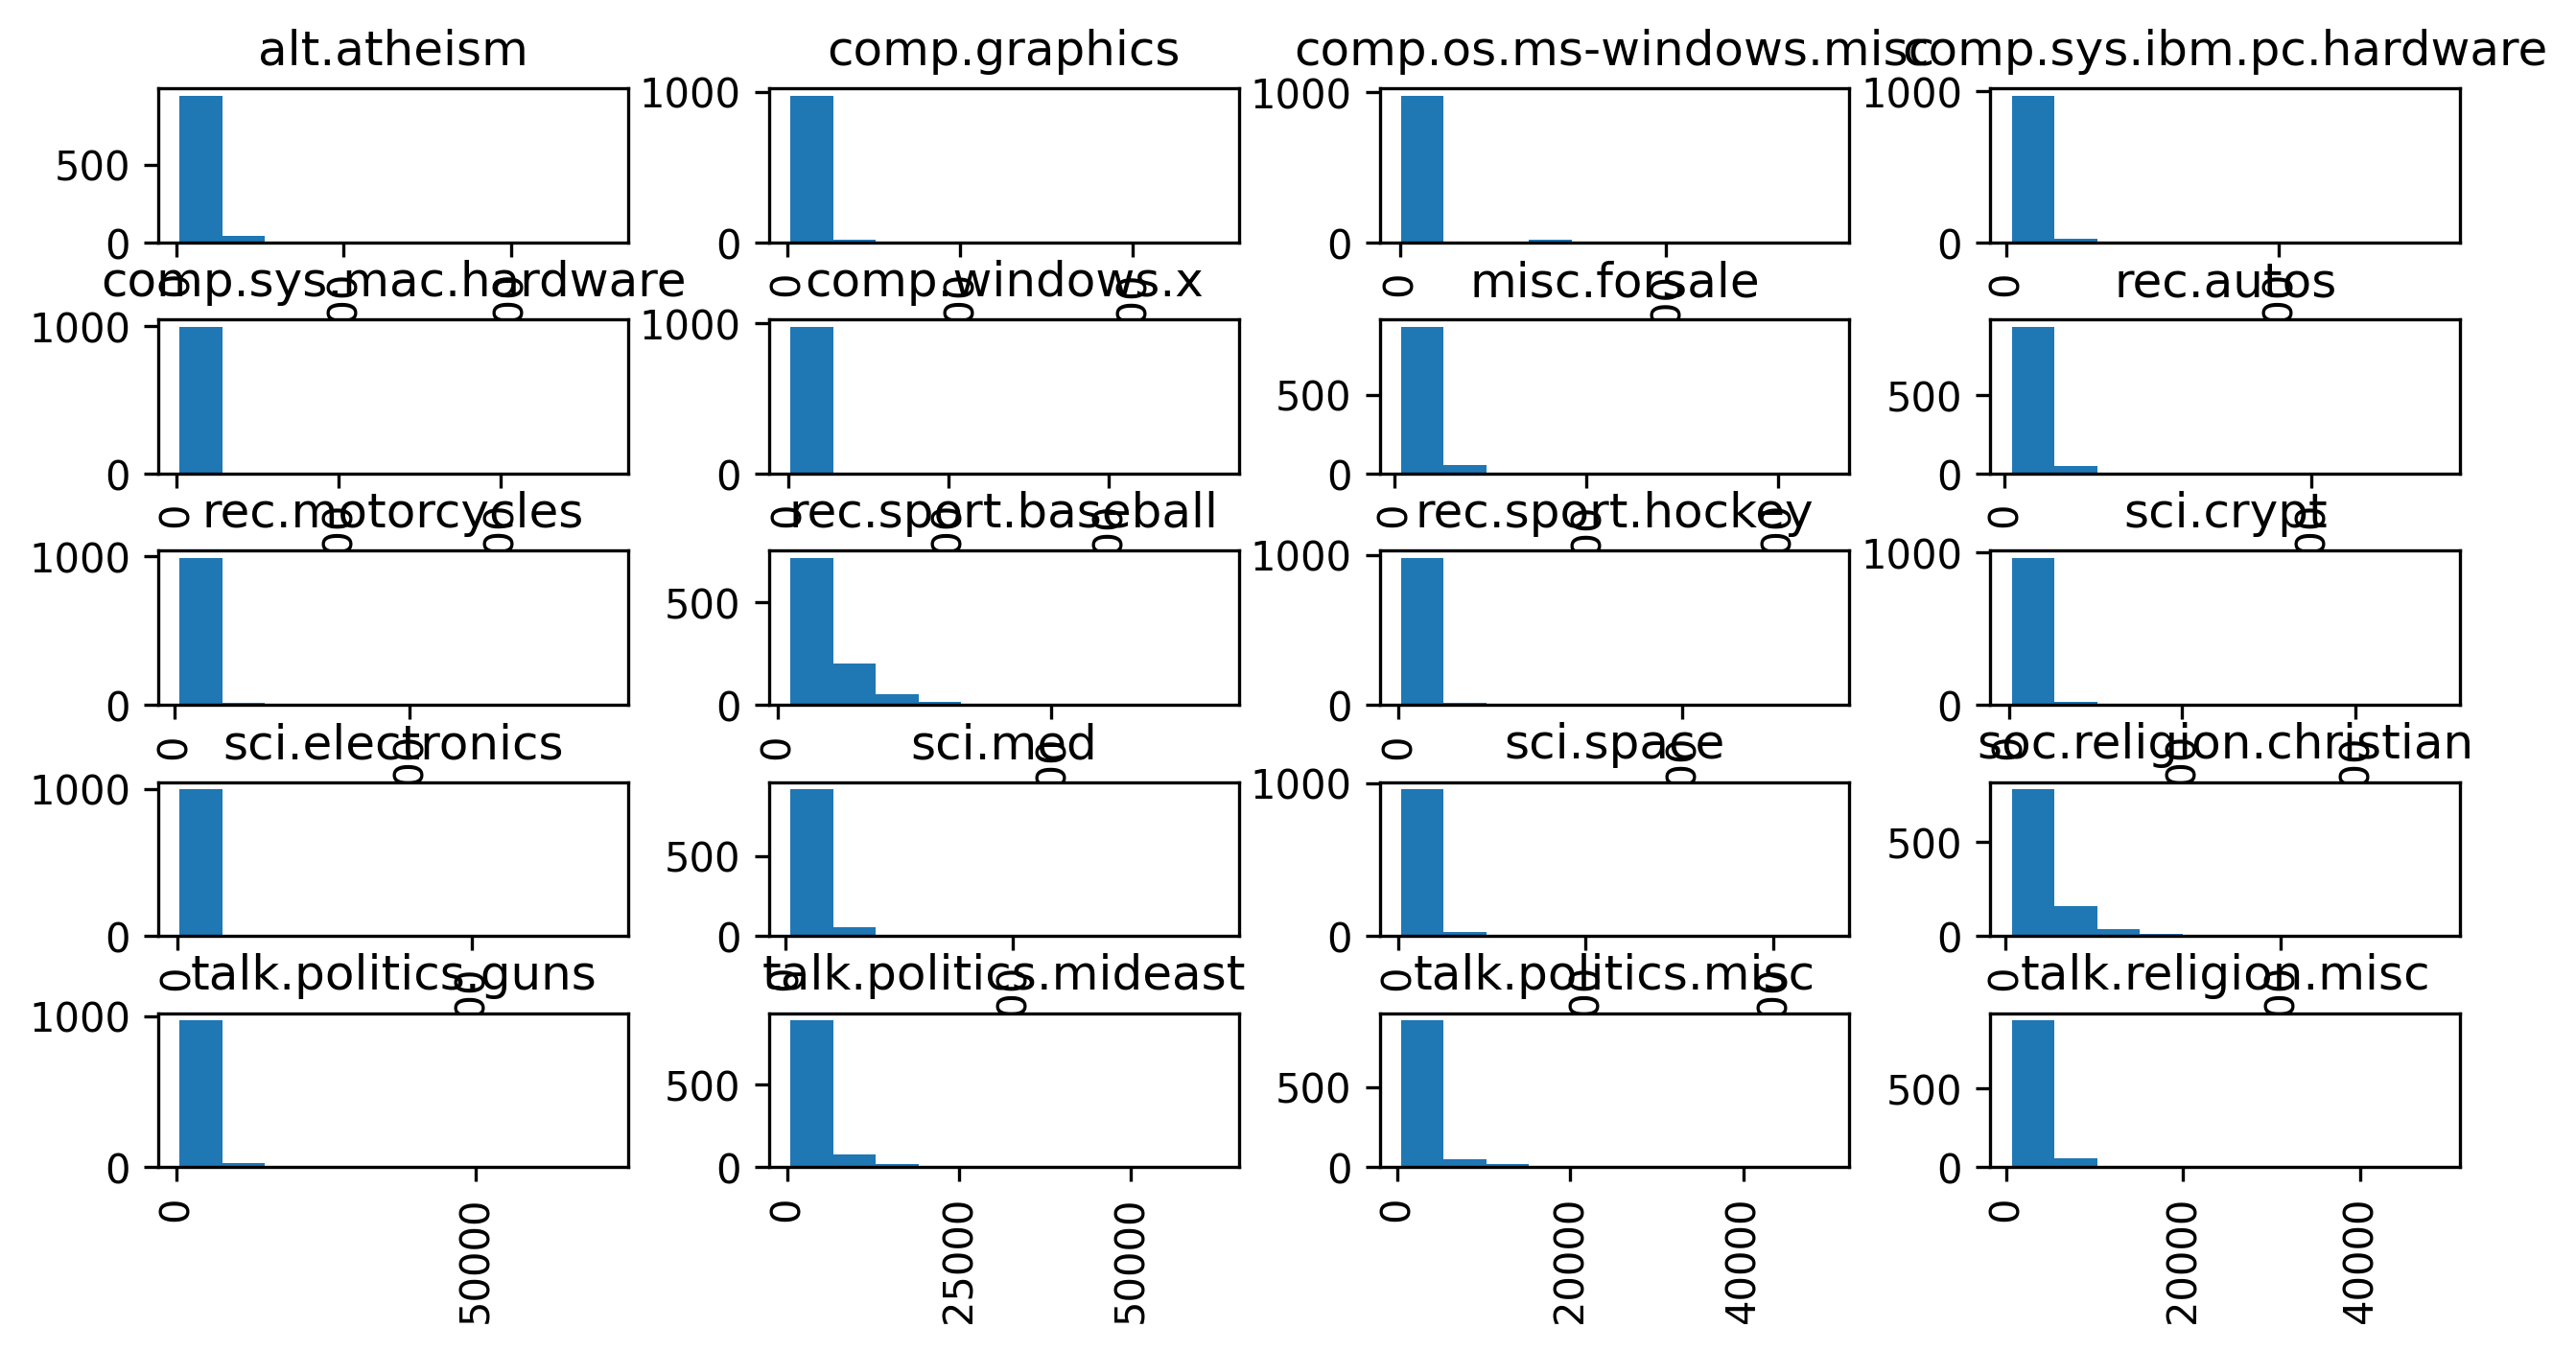

In [7]:
df.hist(column='length', by='Labels')

In [8]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [9]:
# Split the Labels column
df['Labels'] = df['Labels'].str.split('.')
df

,Data,Labels,length
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,"[alt, atheism]",12424
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,"[alt, atheism]",32530
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,"[alt, atheism]",4550
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,"[alt, atheism]",2067
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,"[alt, atheism]",1347
...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,"[talk, religion, misc]",1803
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,"[talk, religion, misc]",2087
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,"[talk, religion, misc]",1621
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,"[talk, religion, misc]",2627


In [10]:
df['Labels'].value_counts()

Labels
[alt, atheism]                    1000
[comp, graphics]                  1000
[talk, politics, misc]            1000
[talk, politics, mideast]         1000
[talk, politics, guns]            1000
[sci, space]                      1000
[sci, med]                        1000
[sci, electronics]                1000
[sci, crypt]                      1000
[rec, sport, hockey]              1000
[rec, sport, baseball]            1000
[rec, motorcycles]                1000
[rec, autos]                      1000
[misc, forsale]                   1000
[comp, windows, x]                1000
[comp, sys, mac, hardware]        1000
[comp, sys, ibm, pc, hardware]    1000
[comp, os, ms-windows, misc]      1000
[talk, religion, misc]            1000
[soc, religion, christian]         997
Name: count, dtype: int64

In [11]:
# One-Hot Encoding
# Flatten the list of lists for the entire column to get unique labels
unique_labels = set(label for sublist in df['Labels'] for label in sublist)
unique_labels = list(unique_labels)

In [12]:
# Initialize a DataFrame to store the one-hot encoded results
one_hot_df = pd.DataFrame(0, index=df.index, columns=unique_labels)

# Populate the one-hot encoding DataFrame
for i, items in enumerate(df['Labels']):
    one_hot_df.loc[i, items] = 1

# Combine the one-hot encoding DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns=['Labels']), one_hot_df], axis=1)
df_encoded

,Data,length,atheism,religion,guns,med,mideast,soc,pc,windows,...,ibm,crypt,forsale,graphics,mac,baseball,x,os,ms-windows,sci
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,12424,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,32530,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,4550,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,2067,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1347,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,1803,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,2087,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,1621,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,2627,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_encoded.columns

Index(['Data', 'length', 'atheism', 'religion', 'guns', 'med', 'mideast',
       'soc', 'pc', 'windows', 'alt', 'hockey', 'space', 'autos', 'sys',
       'christian', 'politics', 'sport', 'comp', 'motorcycles', 'talk', 'misc',
       'electronics', 'hardware', 'rec', 'ibm', 'crypt', 'forsale', 'graphics',
       'mac', 'baseball', 'x', 'os', 'ms-windows', 'sci'],
      dtype='object')

In [14]:
# Explode the data frame Labels

df_exploded = df.explode('Labels').reset_index(drop=True)
df_exploded

,Data,Labels,length
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt,12424
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,atheism,12424
2,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt,32530
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,atheism,32530
4,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt,4550
...,...,...,...
54986,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,religion,2627
54987,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,misc,2627
54988,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk,1362
54989,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,religion,1362


Text(0.5, 1.0, 'WordCloud')

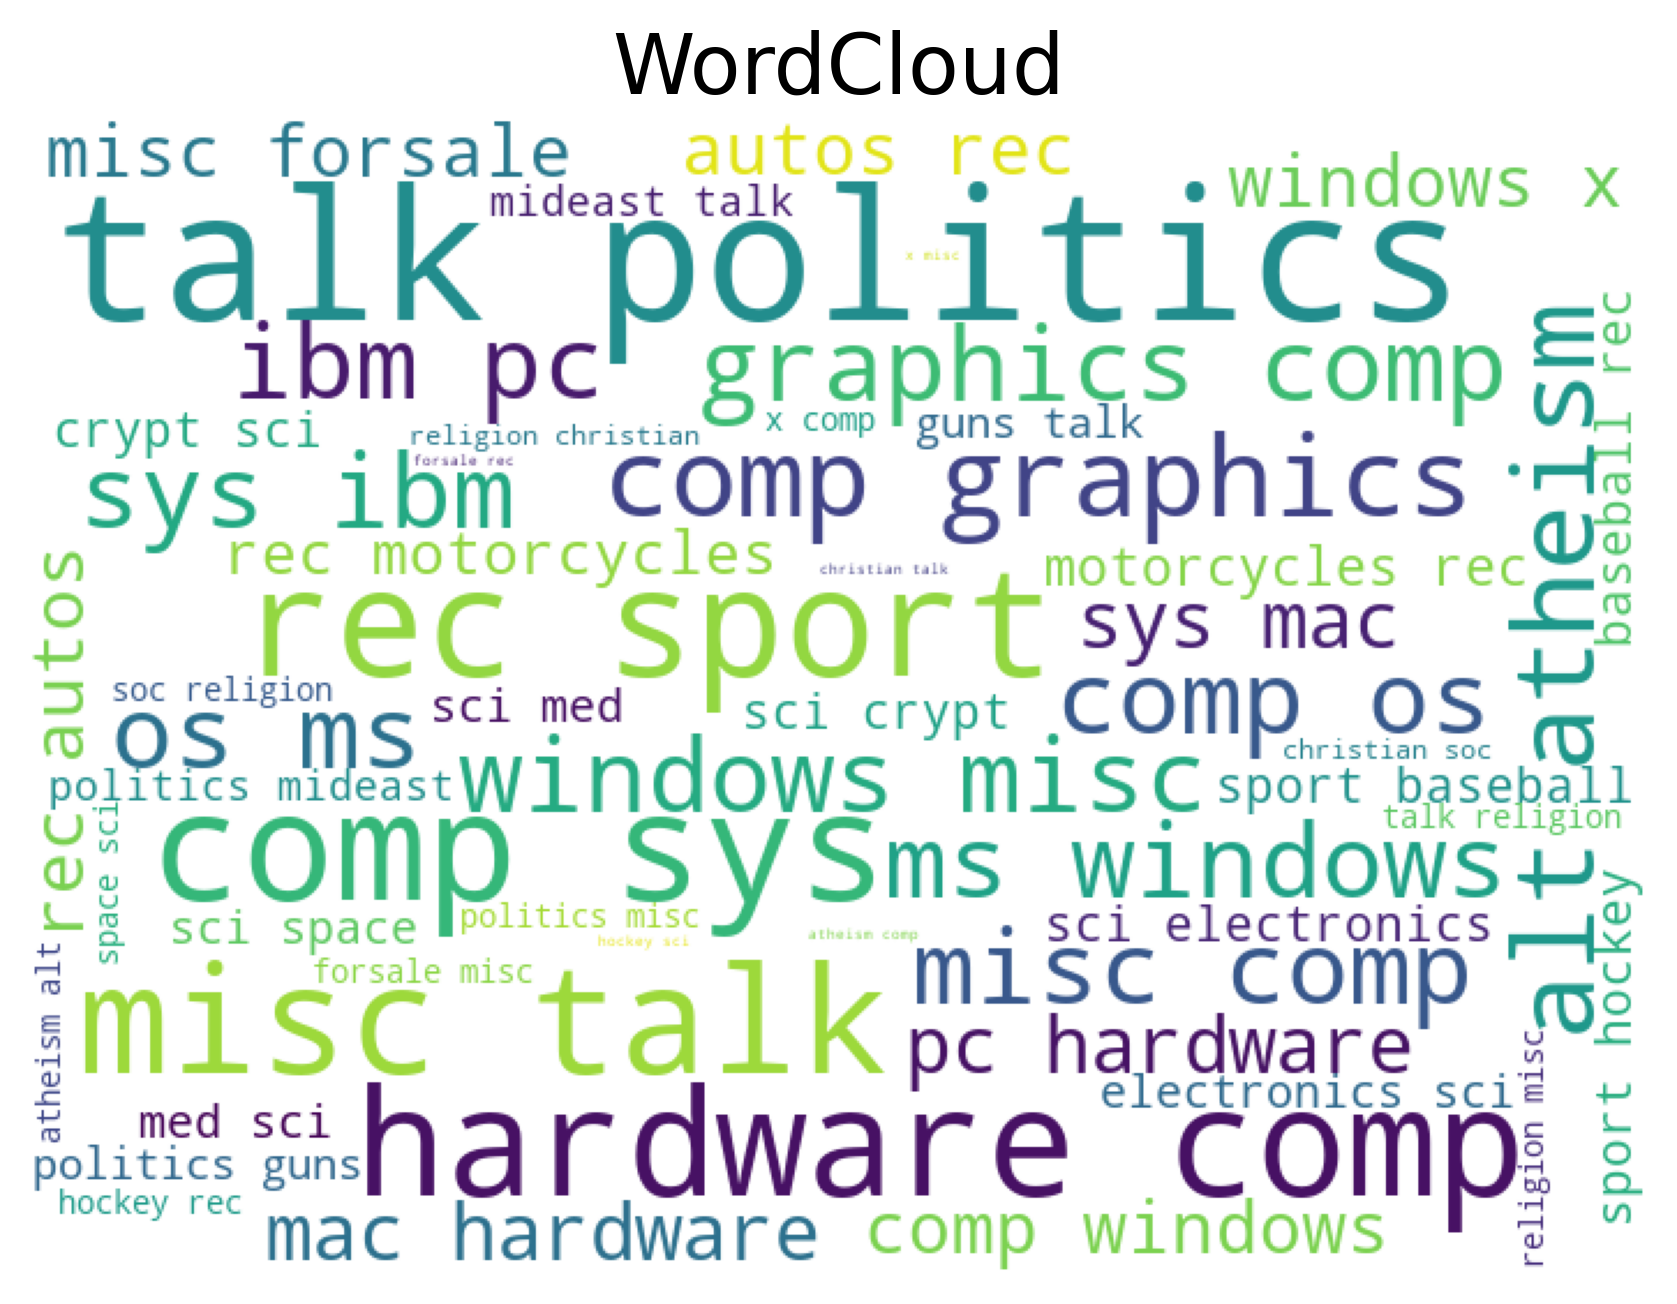

In [15]:
# Visualize the Word cloud

from wordcloud import WordCloud

txt = ' '.join(df_exploded['Labels'])

wc = WordCloud(background_color='white', width=700, height=500).generate(txt)

plt.imshow(wc)
plt.axis('off')
plt.title('WordCloud',size=20)

# Feature Extraction using Tf-IDF

In [16]:
y = df_exploded['Labels']

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import re
corpus = []

lemma = WordNetLemmatizer()

for i in range(len(df_exploded)):
    msg = re.sub('[^a-zA-Z]',' ',df_exploded['Labels'][i])  #Clean the text
    msg = msg.lower() # text normalization
    msg = msg.split() # Word tokenization
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] # Lemmatization
    msg = ' '.join(msg) # join sentences
    corpus.append(msg)

In [20]:
len(corpus)

54991

In [21]:
tf = TfidfVectorizer()

xdata = tf.fit_transform(corpus)
xdata = xdata.toarray()
xdata

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(xdata,y,test_size=0.2,random_state=1)

# Naive Bayes Classification

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

print(f'Train accuracy: {nb.score(xtrain,ytrain)}\nTest accuracy: {nb.score(xtest,ytest)}')

Train accuracy: 0.9464220767412257
Test accuracy: 0.9415401400127285


# **Sentiment analysis**

In [25]:
# Read the data set

df = pd.read_csv('blogs_categories_1.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,replaced by the King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"James Scholars with """"to the potter",precisely because this made,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Matthew's quote fit better. But,this is a blatant error. The,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"correct translation of the Hebrew is indeed """"...",which also,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,makes perfect sense in Zechariah's context,"whereas """"potter's",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961957,You are in the village. Many happy returns! Be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961959,[your ways and means get reign of the tek!],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.dropna(how='all',inplace=True)

In [27]:
for i in range(0,39):
    print(f'Row {i} :> {df[i].unique()}\n\n')

Row 0 :> [' replaced by the King' 'James Scholars with ""to the potter'
 "Matthew's quote fit better.  But" ...
 'You are in the village. Many happy returns! Be seeing you!'
 '[your ways and means get reign of the tek!]' ',talk.religion.misc\r\n']


Row 1 :> [nan ' precisely because this made' ' this is a blatant error.  The' ...
 ' DC 20077-7500' ' MD 20910-9978' " your terminal beomes dumb. There's"]


Row 2 :> [nan ' they' ' ""It is finished;""' ... ' or coke bottles' ' historical'
 ' and it makes me']


Row 3 :> [nan ' the' ' but you' ... ' or for ""just' ' or juke boxes'
 'alt.tv.prisoner']


Row 4 :> [nan ' that Jesus' ') writes:' ... ' DREAM RECALL ' ' Artexerxes?""'
 ' or model']


Row 5 :> [nan ' ""mind""' ' intelligence) testifies that' ' Hawaii'
 ' my pizza.  OK???=' ' addresses' ' education'
 '431) have so far been awarded for ' ' my God' ' the literary hoax'
 'comp.graphics' '32' 's)'
 ' bounce) things of that nature.  Also it has algorithmic texture maps....and your stand

We can drop columns 18 to 38 as they dont have any value in our analysis

In [28]:
columns_to_drop = [x for x in range(18,39)]
columns_to_drop

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38]

In [29]:
df.drop(columns=columns_to_drop, inplace=True)

In [30]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,replaced by the King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"James Scholars with """"to the potter",precisely because this made,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Matthew's quote fit better. But,this is a blatant error. The,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"correct translation of the Hebrew is indeed """"...",which also,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,makes perfect sense in Zechariah's context,"whereas """"potter's",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961954,>otherwise). Once you enter here,your terminal beomes dumb. There's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961955,>something significant about all this ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961957,You are in the village. Many happy returns! Be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961959,[your ways and means get reign of the tek!],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
!pip install clean-text
from cleantext import clean


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [32]:
# Remove emojis (if any)
clean(df, no_emoji=True)

'0 0 replaced by the king\n1 james scholars with ""to the potter\n2 matthew\'s quote fit better. but\n3 correct translation of the hebrew is indeed ""...\n4 makes perfect sense in zechariah\'s context\n... ...\n961954 >otherwise). once you enter here\n961955 >something significant about all this ...\n961957 you are in the village. many happy returns! be...\n961959 [your ways and means get reign of the tek!]\n961960 ,talk.religion.misc\n1 2 3 4 5 6 7 0 nan nan nan nan nan nan nan\n1 precisely because this made nan nan nan nan nan nan\n2 this is a blatant error. the nan nan nan nan nan nan\n3 which also nan nan nan nan nan nan\n4 whereas ""potter\'s nan nan nan nan nan nan\n... ... ... ... ... ... ... ...\n961954 your terminal beomes dumb. there\'s nan nan nan nan nan nan\n961955 nan nan nan nan nan nan nan\n961957 nan nan nan nan nan nan nan\n961959 nan nan nan nan nan nan nan\n961960 nan nan nan nan nan nan nan\n8 9 10 11 12 13 14 15 16 17\n0 nan nan nan nan nan nan nan nan nan nan\n1 

In [33]:
# Tokenization


# VADER - Sentiment Analysis

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
sia = SentimentIntensityAnalyzer()

In [36]:
# Concatenate the values in each rows
df['text'] = df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [37]:
df['text']

0                                      replaced by the King
1         James Scholars with ""to the potter  precisely...
2         Matthew's quote fit better.  But  this is a bl...
3         correct translation of the Hebrew is indeed ""...
4         makes perfect sense in Zechariah's context  wh...
                                ...                        
961954    >otherwise). Once you enter here  your termina...
961955            >something significant about all this ...
961957    You are in the village. Many happy returns! Be...
961959          [your ways and means get reign of the tek!]
961960                              ,talk.religion.misc\r\n
Name: text, Length: 815042, dtype: object

In [38]:
# import re
# Remove special symbols (example includes !, @, #, $, %, &, etc.)
# df['text'] = df['text'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

In [39]:
# Use only the concatenated column in df
df = df['text']

In [40]:
df

0                                      replaced by the King
1         James Scholars with ""to the potter  precisely...
2         Matthew's quote fit better.  But  this is a bl...
3         correct translation of the Hebrew is indeed ""...
4         makes perfect sense in Zechariah's context  wh...
                                ...                        
961954    >otherwise). Once you enter here  your termina...
961955            >something significant about all this ...
961957    You are in the village. Many happy returns! Be...
961959          [your ways and means get reign of the tek!]
961960                              ,talk.religion.misc\r\n
Name: text, Length: 815042, dtype: object

In [41]:
# Check the SentimentIntensityAnalyzer polarity score
sia.polarity_scores(df.iloc[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [43]:
# Check the SentimentIntensityAnalyzer polarity score
sia.polarity_scores(df.iloc[2])

{'neg': 0.249, 'neu': 0.491, 'pos': 0.26, 'compound': -0.2144}

In [52]:
# Check the polarity scores on entire dataset
res = {}
for index, row in df.items():
    res[index] = sia.polarity_scores(row)


In [53]:
res

{0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.249, 'neu': 0.491, 'pos': 0.26, 'compound': -0.2144},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.1027},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.2732},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.34},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0

In [61]:
# Convert to a Dataframe
pscores = pd.DataFrame(res).T
pscores

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.249,0.491,0.260,-0.2144
3,0.000,1.000,0.000,0.0000
4,0.000,0.654,0.346,0.5719
...,...,...,...,...
961954,0.268,0.732,0.000,-0.5106
961955,0.000,0.735,0.265,0.2023
961957,0.000,0.700,0.300,0.6467
961959,0.000,1.000,0.000,0.0000


In [63]:
pscores.dtypes

neg         float64
neu         float64
pos         float64
compound    float64
dtype: object

In [69]:
# Add these values into df
df = pd.concat([df,pscores], axis=1)

In [70]:
df

,text,neg,neu,pos,compound
0,replaced by the King,0.000,1.000,0.000,0.0000
1,"James Scholars with """"to the potter precisely...",0.000,1.000,0.000,0.0000
2,Matthew's quote fit better. But this is a bl...,0.249,0.491,0.260,-0.2144
3,"correct translation of the Hebrew is indeed """"...",0.000,1.000,0.000,0.0000
4,makes perfect sense in Zechariah's context wh...,0.000,0.654,0.346,0.5719
...,...,...,...,...,...
961954,>otherwise). Once you enter here your termina...,0.268,0.732,0.000,-0.5106
961955,>something significant about all this ...,0.000,0.735,0.265,0.2023
961957,You are in the village. Many happy returns! Be...,0.000,0.700,0.300,0.6467
961959,[your ways and means get reign of the tek!],0.000,1.000,0.000,0.0000


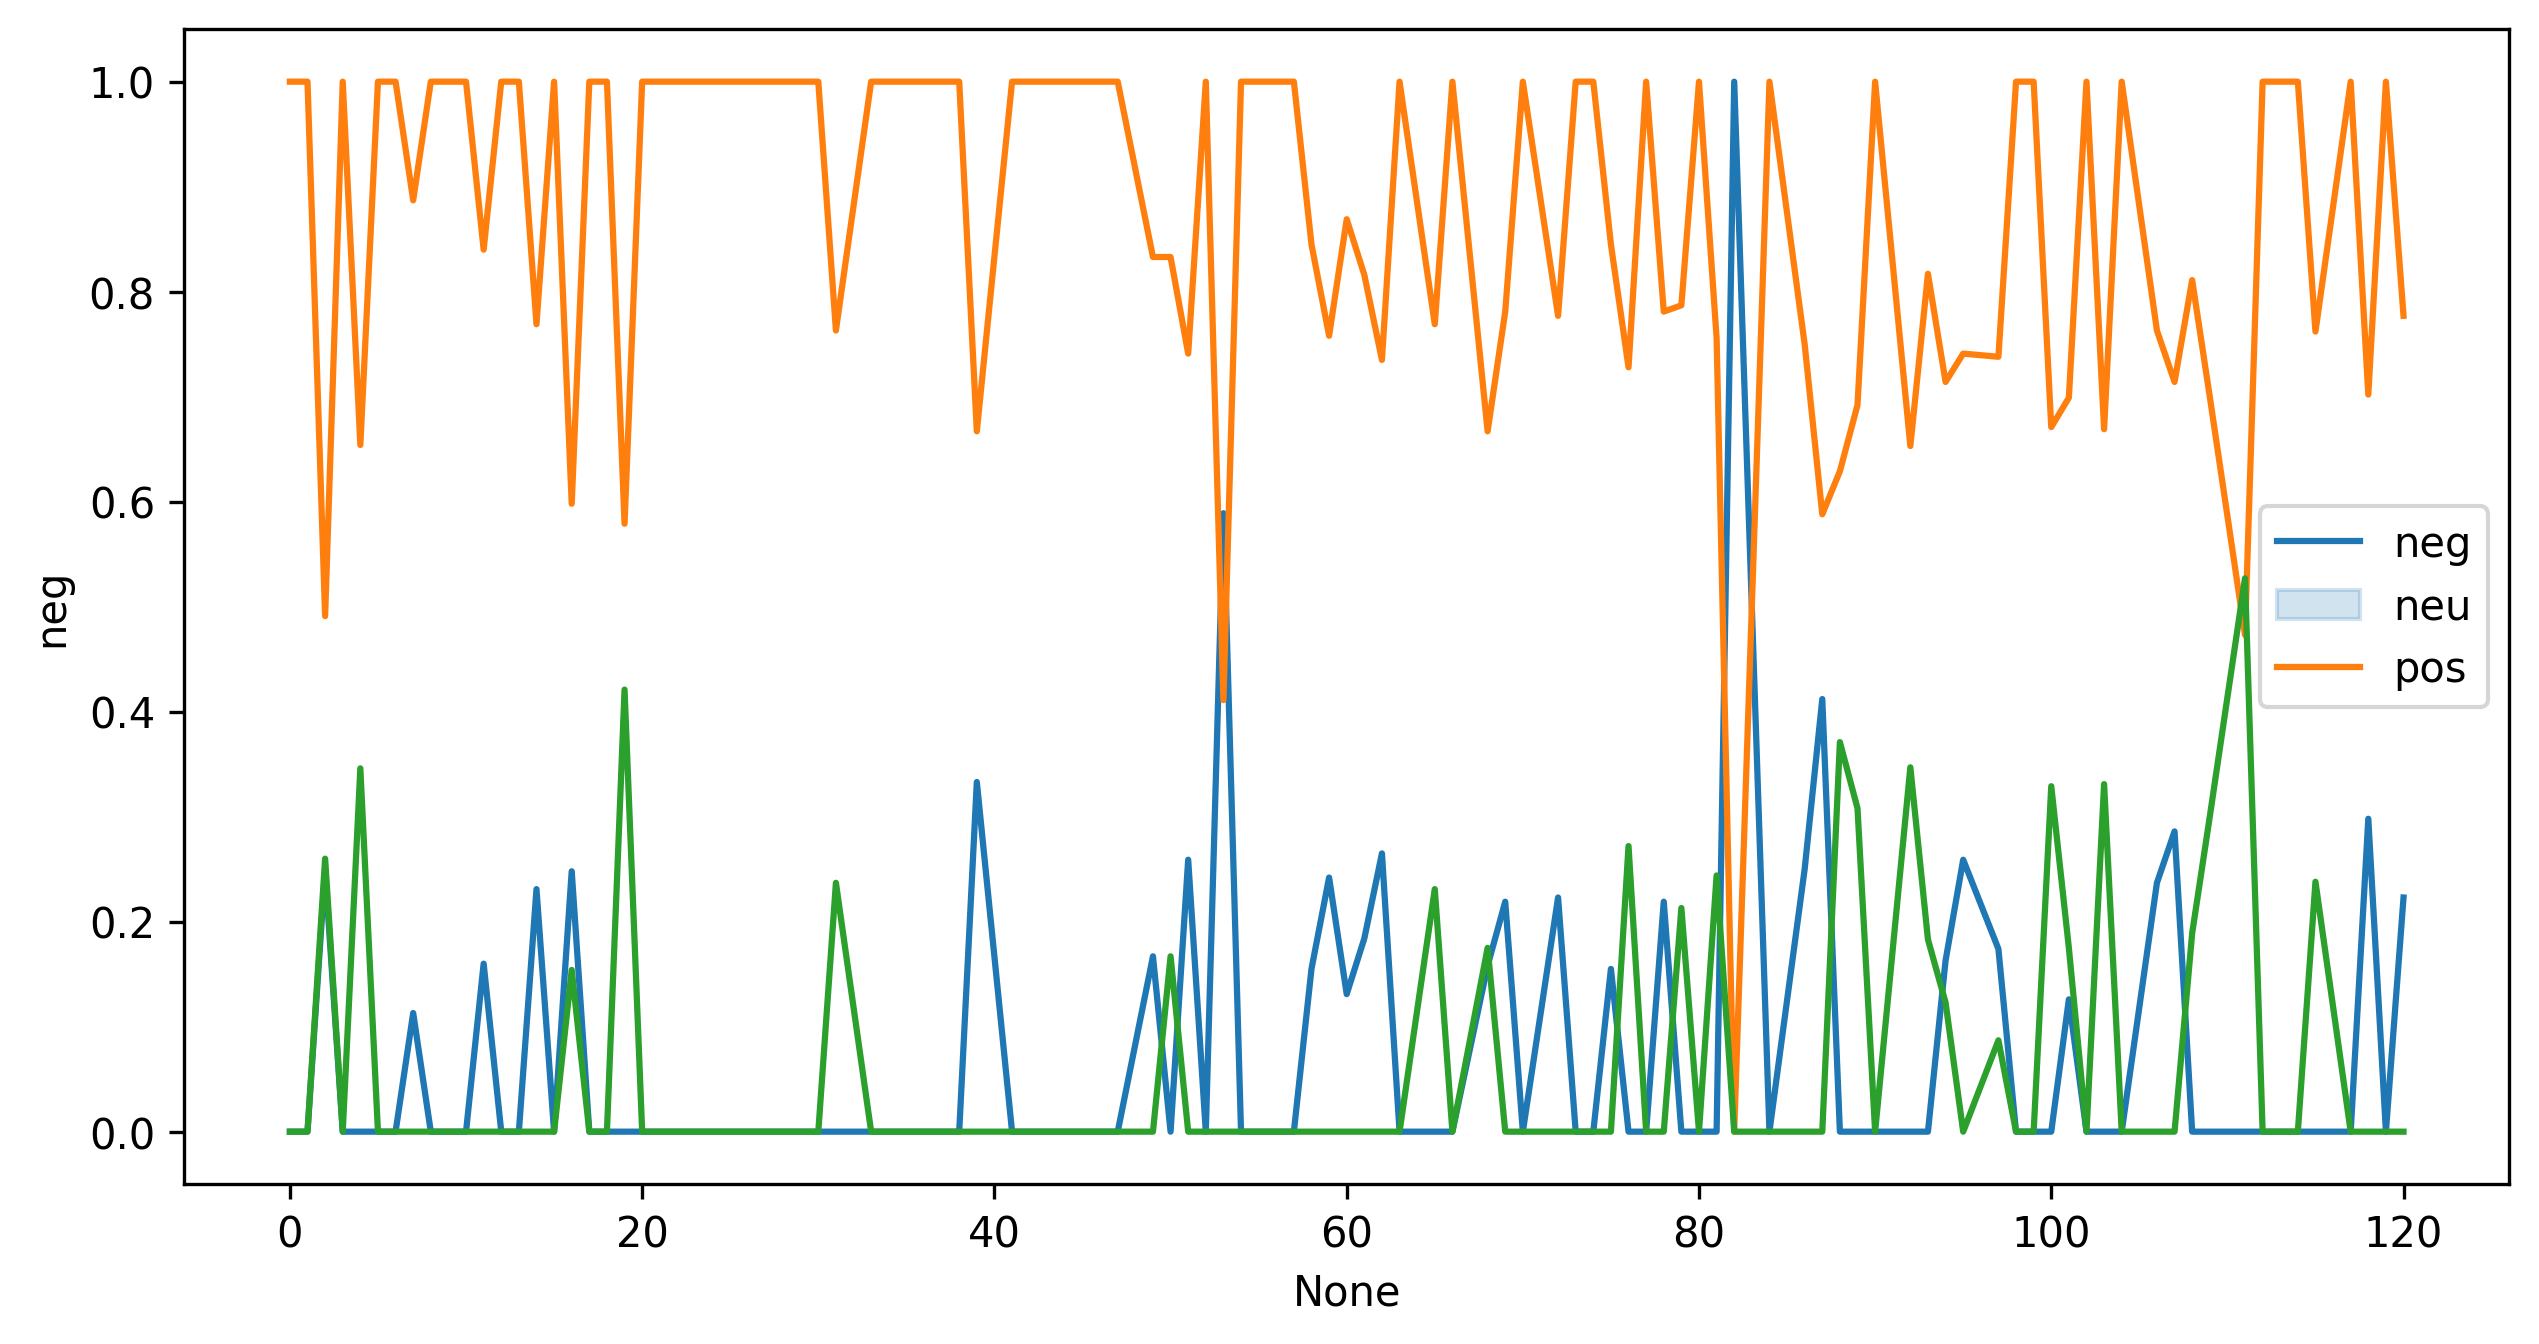

In [79]:
# Plot the results for a subset of the data
subset = df.iloc[0:101]
sns.lineplot(data=subset, x=subset.index, y='neg')
sns.lineplot(data=subset, x=subset.index, y='neu')
sns.lineplot(data=subset, x=subset.index, y='pos')
plt.legend(['neg','neu','pos'])

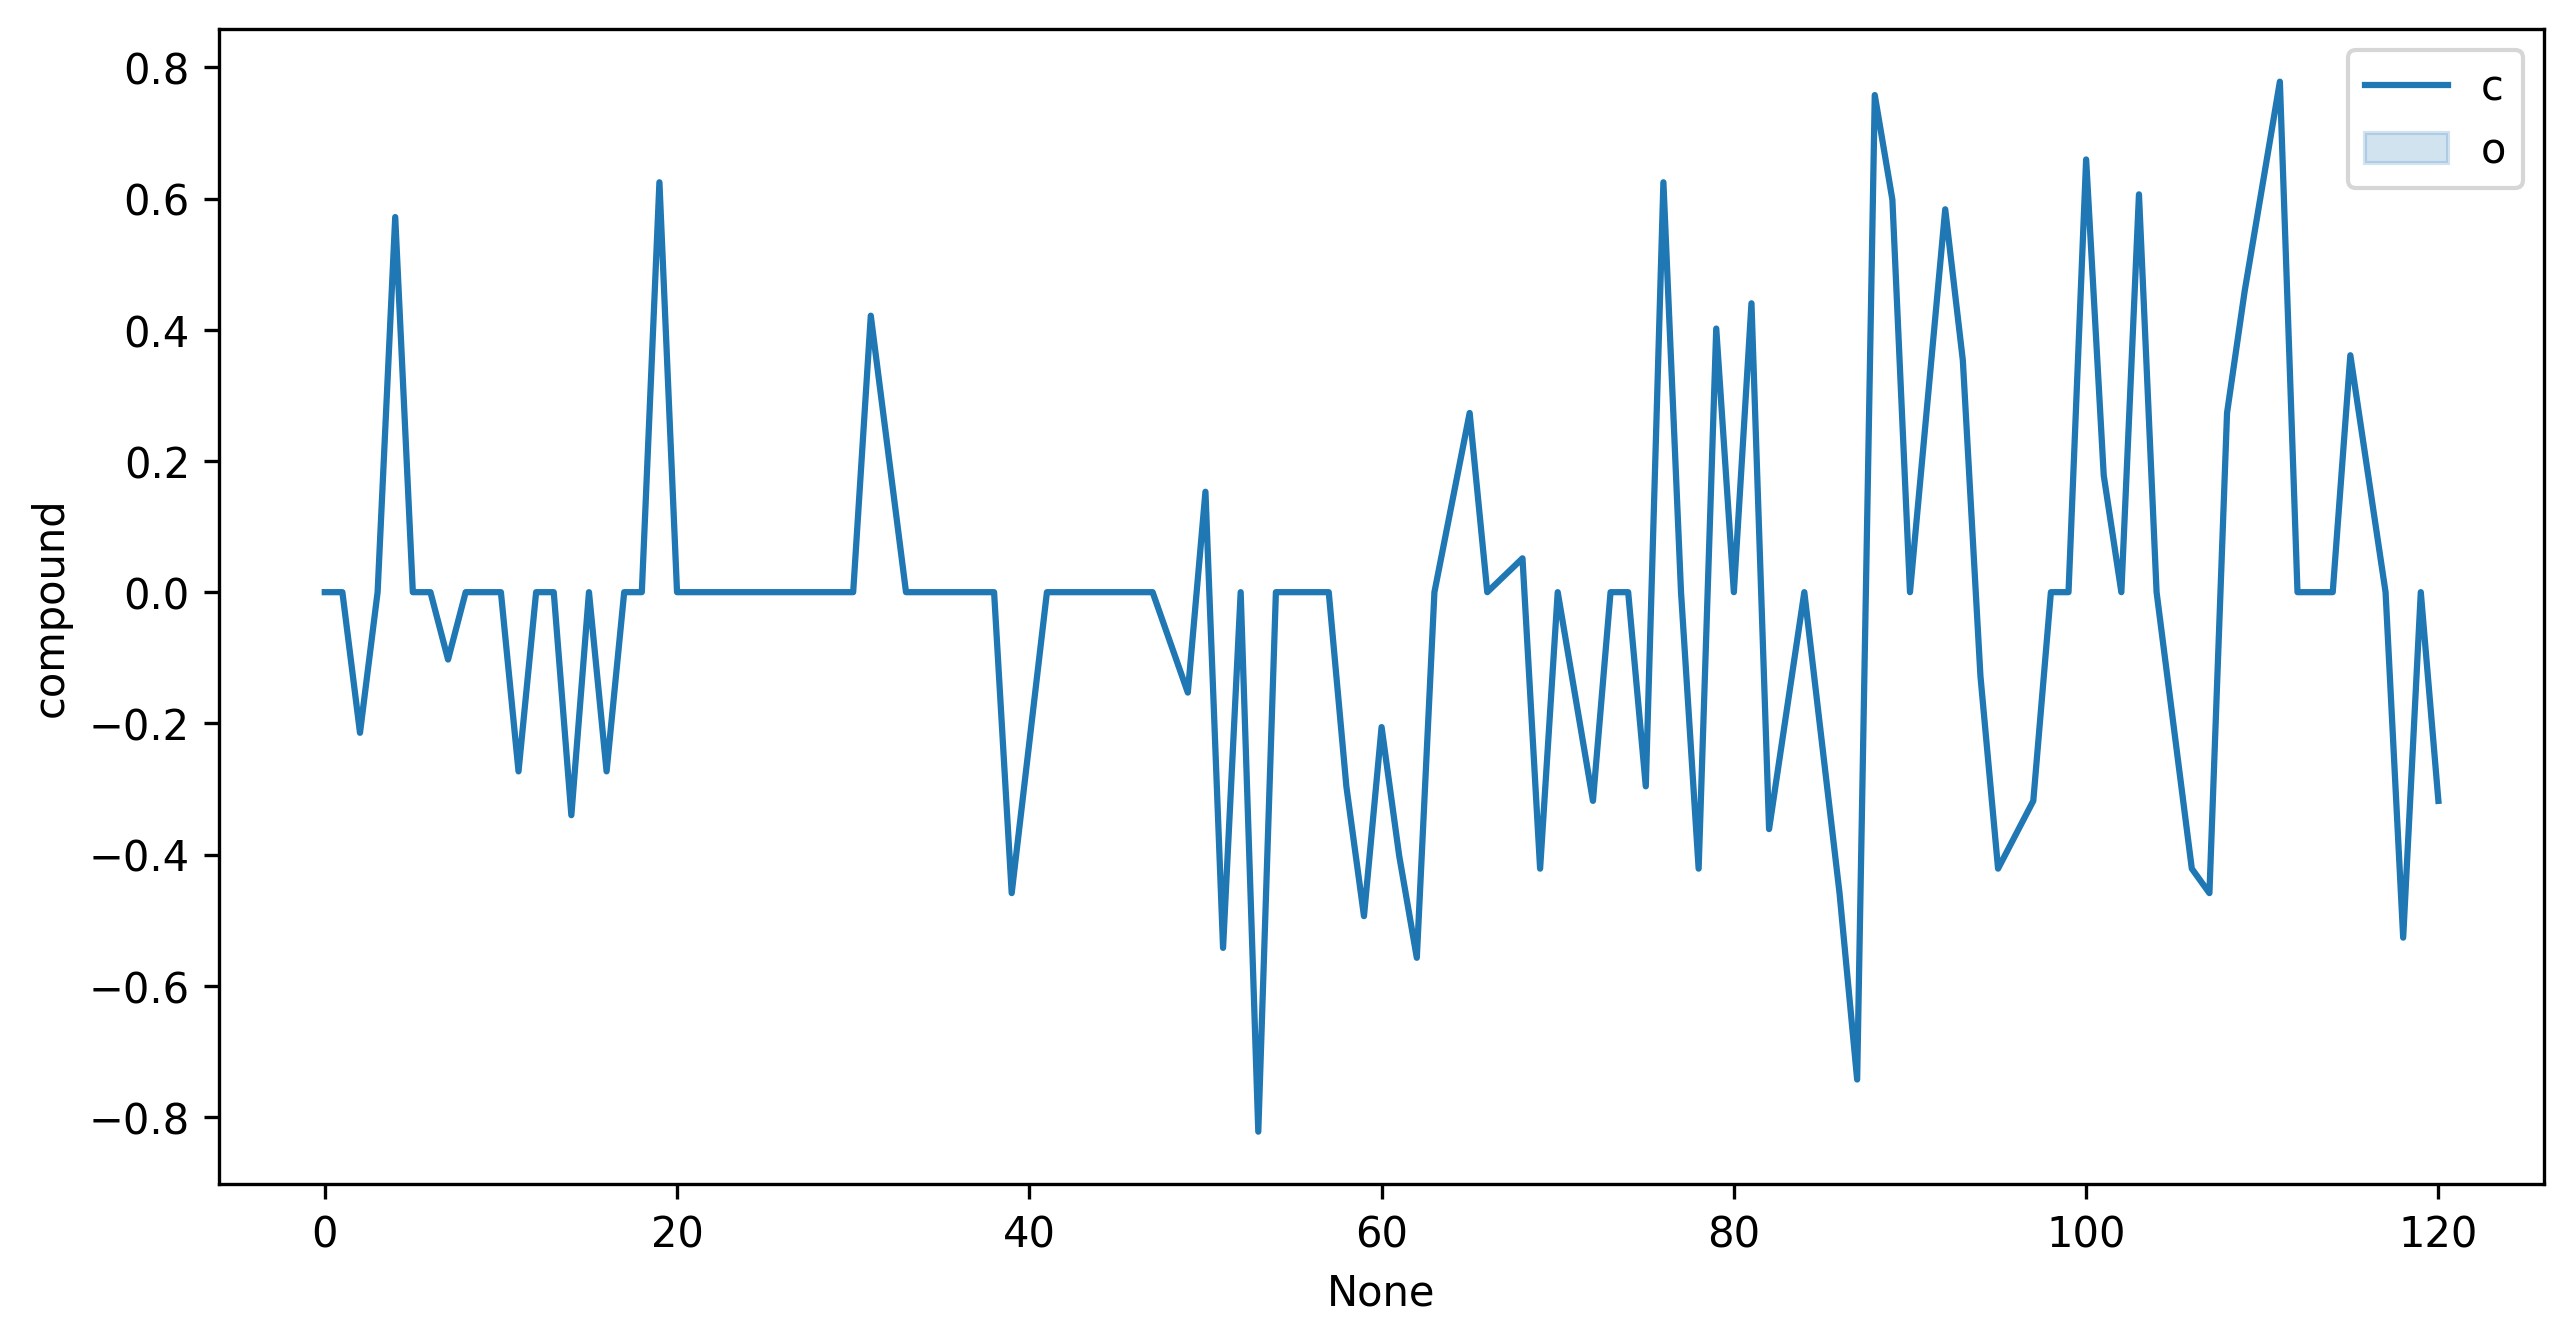

In [81]:
# Plot the compound values
subset = df.iloc[0:101]
sns.lineplot(data=subset, x=subset.index, y='compound')
plt.legend('compound')

From the above plots we observe that the negative and positive have a direct influence on the overall compound score of the texts.

In [85]:
# Results of Naives Bayes CLassification report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       195
     atheism       1.00      1.00      1.00       240
       autos       1.00      1.00      1.00       202
    baseball       1.00      1.00      1.00       211
   christian       1.00      1.00      1.00       180
        comp       0.70      1.00      0.82       995
       crypt       1.00      1.00      1.00       186
 electronics       1.00      1.00      1.00       181
     forsale       1.00      1.00      1.00       204
    graphics       1.00      1.00      1.00       219
        guns       1.00      1.00      1.00       206
    hardware       1.00      1.00      1.00       425
      hockey       1.00      1.00      1.00       209
         ibm       1.00      1.00      1.00       178
         mac       1.00      1.00      1.00       188
         med       1.00      1.00      1.00       212
     mideast       1.00      1.00      1.00       194
        misc       1.00    

**Sentiment analysis**

- Positive Sentiment: If a majority of blog posts show positive sentiment, it might suggest that the content resonates well with the audience. Positive sentiment typically reflects content that is encouraging, informative, and engaging. For example, blogs that discuss motivational topics, success stories, or positive experiences may naturally evoke positive reactions.
- Negative Sentiment: A negative sentiment trend may indicate dissatisfaction, frustration, or criticism in the content or its subject matter. This can reflect either the tone of the author (e.g., critical reviews, discussing societal problems) or the reaction from readers who might not agree with the viewpoint or the quality of the posts.
- Neutral Sentiment: A predominantly neutral sentiment often implies the blog posts are informative or objective in nature without a strong emotional tone. This can be common in educational, technical, or news-related blogs where the goal is to inform rather than evoke an emotional response.

In [88]:
# Descriptive stats on the Polarity values
df.iloc[:,1:].describe()

,neg,neu,pos,compound
count,815042.000000,815042.000000,815042.000000,815042.000000
mean,0.031887,0.887577,0.046688,0.017784
std,0.097234,0.227512,0.123076,0.227462
min,0.000000,0.000000,0.000000,-0.978100
25%,0.000000,0.828000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.971900
